In [250]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Importamos los datasets provistos

coursera_courses = pd.read_csv("Datasets\Coursera_courses.csv")
coursera_reviews = pd.read_csv("Datasets\Coursera_reviews.csv")
edx = pd.read_csv("Datasets\edx_courses.csv")
udemy = pd.read_csv(r"Datasets\udemy_courses.csv")


In [7]:
# Comenzaremos revisando los datos de Udemy
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [8]:
# Verificamos que no tiene datos nulos
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [13]:
# Repasamos algunos datos
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
# Buscamos registros duplicados
udemy.duplicated().sum()

6

In [10]:
# Eliminamos los 6 registros duplicados
udemy.drop_duplicates(inplace=True)

Obtendremos a continuación algunas métricas de Udemy

<AxesSubplot: xlabel='is_paid', ylabel='count'>

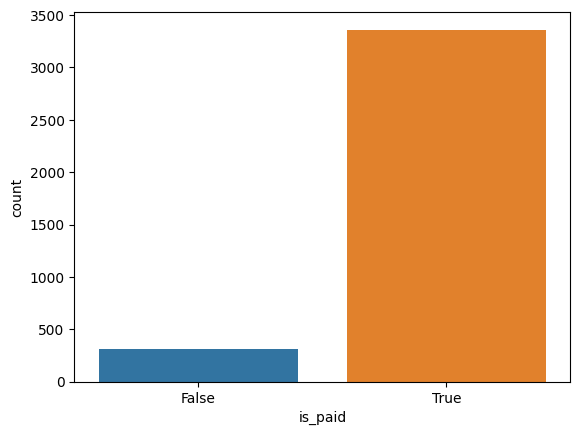

In [12]:
# Proporción de cursos pagos y gratuitos
sns.countplot(x=udemy["is_paid"])

Vemos que la mayor parte de los cursos son pagos

<AxesSubplot: xlabel='price', ylabel='Count'>

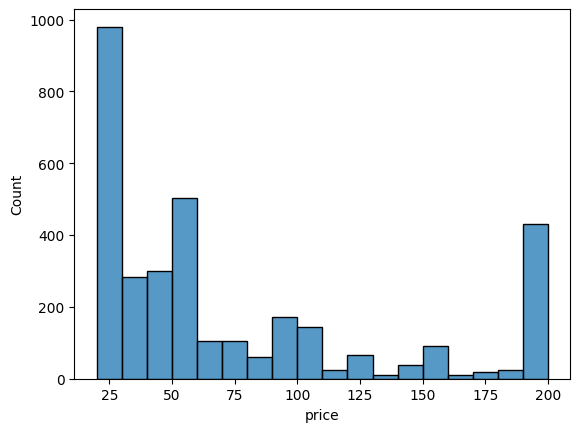

In [28]:
# Distribución del precio de los cursos pagos
sns.histplot(data=udemy[udemy["is_paid"]==True], x="price")

Notamos que Udemy ofrece una mayor proporción de cursos de bajo costo, que a medida que el precio sube la cantidad de cursos disminuye, pero ofrece una gran cantidad de cursos tambien en el valor máximo de los mismos

Revisaremos ahora si el resto de las columnas contienen outliers

<AxesSubplot: xlabel='num_subscribers'>

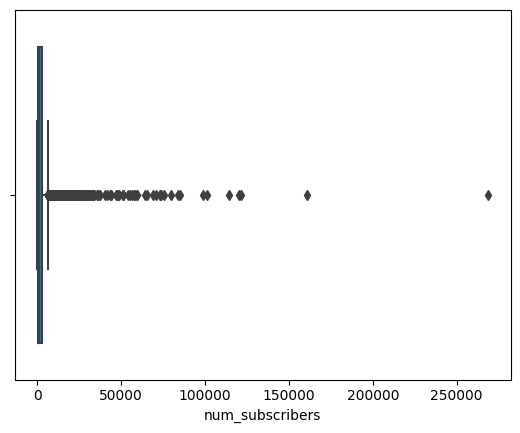

In [30]:
# Graficamos número de suscriptores
sns.boxplot(data=udemy, x="num_subscribers")

En principio por la distribución podriamos asumir que los valores estan correctos. Verificaremos los registros de mayor valor buscando algun dato que nos ayude a tomar la decisión correcta

In [33]:
udemy.sort_values(by="num_subscribers", ascending=False).head(30)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15T17:00:33Z,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19T03:02:05Z,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development


Vemos que entre los cursos con mayor cantidad de suscriptores la mayor parte son gratuitos, y la cantidad de reviews acompaña esa cantidad de suscriptores. Por otro lado, encontramos tambien cursos con los valores mas altos, pero con una duración elevada y gran cantidad de reviews. Concluimos que se trata de datos ciertos.

<AxesSubplot: xlabel='num_reviews'>

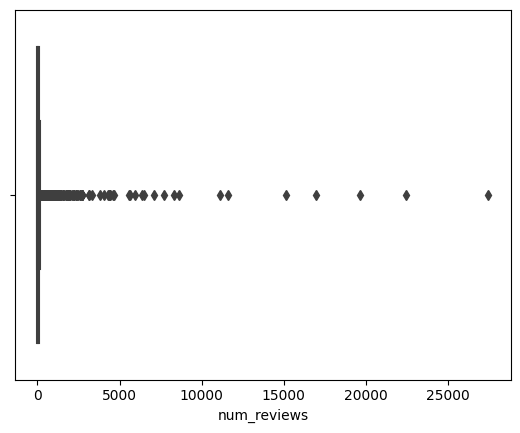

In [36]:
# Graficamos número de reviews, de lectures y de duración
sns.boxplot(data=udemy, x="num_reviews")

<AxesSubplot: xlabel='num_lectures'>

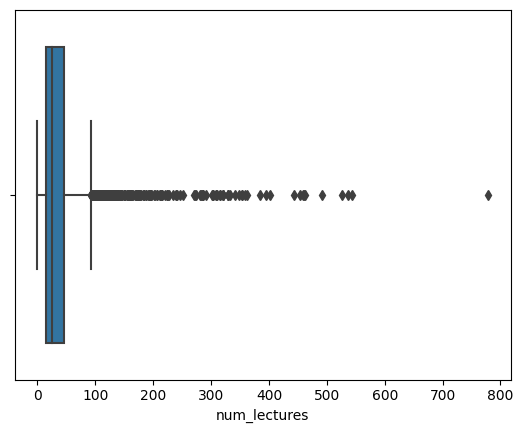

In [37]:
sns.boxplot(data=udemy, x="num_lectures")

<AxesSubplot: xlabel='content_duration'>

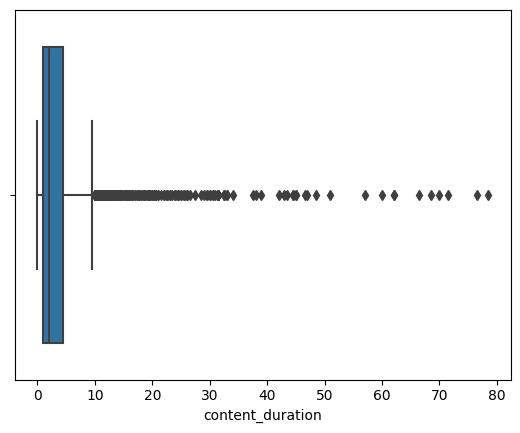

In [38]:
sns.boxplot(data=udemy, x="content_duration")

Concluimos que son todos datos correctos

<AxesSubplot: xlabel='level', ylabel='count'>

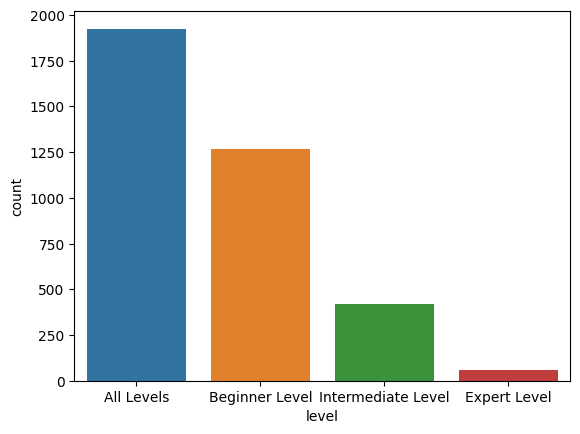

In [44]:
#Veamos la distribución por nivel
sns.countplot(data=udemy, x="level", order=udemy['level'].value_counts().index)

La distribución resulta lógica, la mayor cantidad de cursos para todos los niveles, y luego en descenso desde los niveles básicos hasta los avanzados.

Por último, analizaremos la distribución de la temática del curso


<AxesSubplot: xlabel='subject', ylabel='count'>

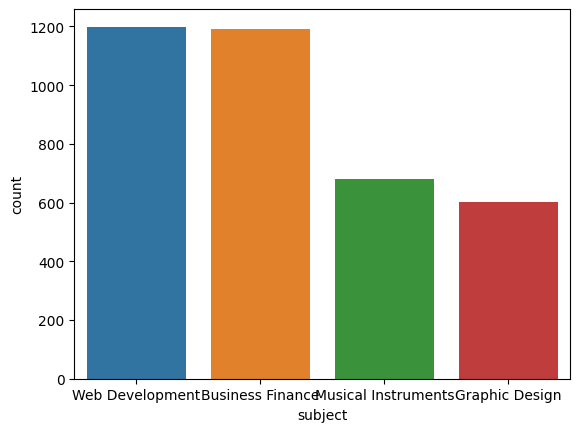

In [45]:
sns.countplot(data=udemy, x="subject", order=udemy['subject'].value_counts().index)

Vemos que los dos temas principales de los cursos son Desarrollo Web y Finanzas de los Negocios

Generamos ahora una nube de palabras con los títulos de los cursos de Udemy

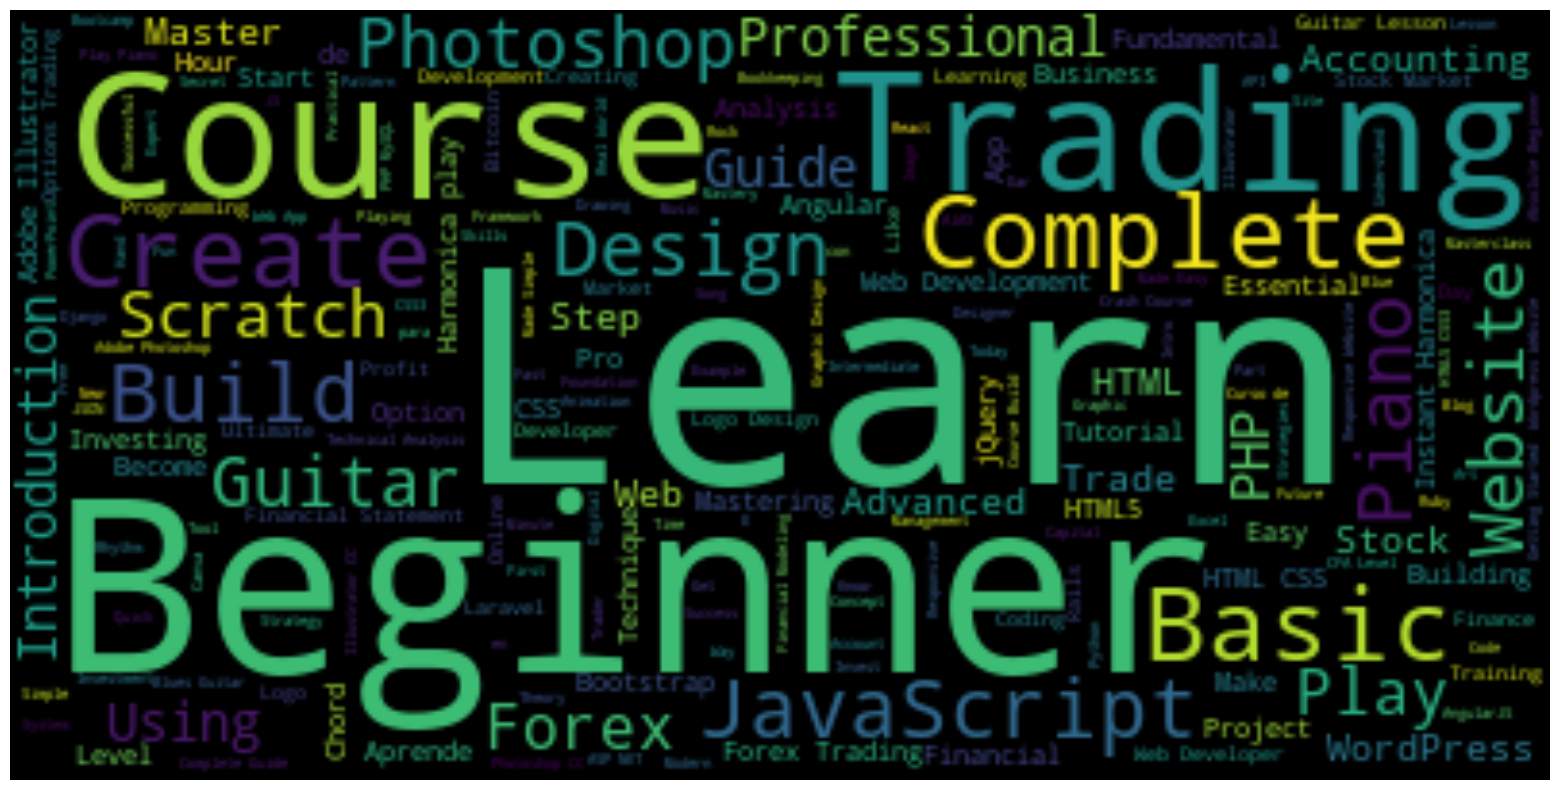

In [124]:
texto = udemy['course_title'].str.cat(sep=' ')
cloud = WordCloud(stopwords = stopwords).generate(texto)
plt.figure(figsize=(20,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Vemos que (mas allá de las palabras que seguramente aparecerian, como "Learn" y Course"), Beginner y Basic son dos de las mas utilzadas, por lo que el foco Udemy lo pone sobre cursos para principiantes. Con respecto a las temáticas, se destacan palabras como Website, Trading, Design, Photoshop, Guitar, Piano, Forex, PHP y Javascript

Continuaremos el analisis de Udemy en PowerBi

In [141]:
# Exportamos el dataframe
udemy.drop(["course_id","course_title","url","count"],axis=1).to_csv("udemypowerbi.csv")

Comenzaremos a trabajar ahora con los datos de EDX

In [151]:
edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [203]:
# Buscamos columnas con datos nulos
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

La única columna con datos nulos que es relevante para el análisis, es la del número de enrolados, ya que la base del trabajo a realizar consiste en detectar el impacto del resto de variables sobre las ventas (enrolados en el caso de EDX, ya que no contamos con la cantidad de enrolados que abonaron el certificado, pero asumiremos que la cantidad es proporcional en todos los cursos). Por lo tanto, eliminaremos aquellos registros sin el dato de cantidad de enrolados.

In [204]:
edx.dropna(subset="n_enrolled", inplace= True)

In [205]:
# Verificamos existencia de registros duplicados
edx.duplicated().sum()

1

In [206]:
# Eliminamos el registro duplicado
edx.drop_duplicates(inplace=True)

In [207]:
# Eliminamos las columnas que no utilizaremos
edx.drop(["summary","institution","instructors","subtitles", "course_effort","course_length","course_description","course_syllabus","course_url"],axis=1,inplace=True)

In [208]:
# Ajustamos a número el formato de cantidad de enrolados
edx["enrolled"] = edx["n_enrolled"].str.replace(",","")

In [209]:
edx.drop(["n_enrolled"],axis=1,inplace=True)

In [217]:
edx['enrolled'] = edx['enrolled'].astype('Int64')

In [220]:
# Revisamos la cantidad de enrolados
edx.describe()

,enrolled
count,8.540000e+02
mean,5.320879e+04
std,1.190911e+05
min,5.001000e+03
25%,1.176425e+04
50%,2.411900e+04
75%,5.465250e+04
max,2.442271e+06


<AxesSubplot: xlabel='enrolled'>

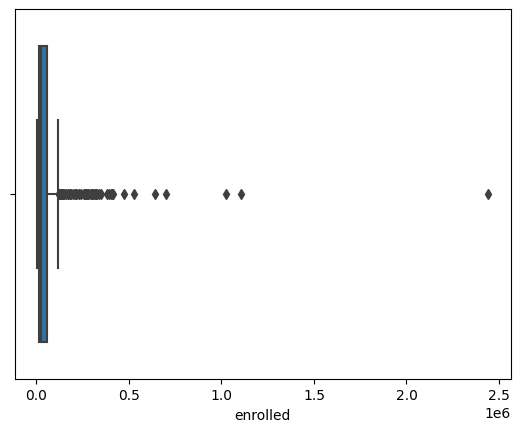

In [223]:
# Graficamos en busqueda de outliers
sns.boxplot(data=edx, x="enrolled")

In [225]:
# Inspeccionamos los cursos con mayor cantidad de inscriptos
edx.sort_values(by="enrolled", ascending=False).head(30)

,title,course_type,Level,subject,language,price,enrolled
2,CS50's Introduction to Computer Science,Self-paced on your time,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $90 USD,2442271
29,IELTS Academic Test Preparation,Self-paced on your time,Introductory,Communication,English,FREE-Add a Verified Certificate for $99 USD,1103777
31,TOEFL® Test Preparation: The Insider’s Guide,Self-paced on your time,Introductory,Communication,English,FREE-Add a Verified Certificate for $49 USD,1022489
23,CS50's Web Programming with Python and JavaScript,Self-paced on your time,Intermediate,Computer Science,English,FREE-Add a Verified Certificate for $90 USD,698950
64,Introduction to Linux,Self-paced on your time,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $199 USD,642088
16,Data Science: R Basics,Self-paced on your time,Introductory,Data Analysis & Statistics,English,FREE-Add a Verified Certificate for $49 USD,528782
48,The Science of Happiness,Self-paced on your time,Introductory,Social Sciences,English,FREE-Add a Verified Certificate for $169 USD,475614
24,Contract Law: From Trust to Promise to Contract,Self-paced on your time,Intermediate,Business & Management,English,FREE-Add a Verified Certificate for $125 USD,414181
30,The Architectural Imagination,Self-paced on your time,Introductory,Architecture,English,FREE-Add a Verified Certificate for $99 USD,406181
35,Basic Spanish 1: Getting Started,Self-paced on your time,Introductory,Communication,English,FREE-Add a Verified Certificate for $40 USD,400169


Detectamos por los títulos que se trata de cursos introductorios y con un público objetivo masivo, y considerando que los cursos de EDX son gratuitos y solo se abona el certificado en caso de requerirlo el usuario, damos por válidos los valores de cantidad de enrolados.

Graficaremos a continuación algunas distribuciones sobre los datos de EDX

<AxesSubplot: xlabel='course_type', ylabel='count'>

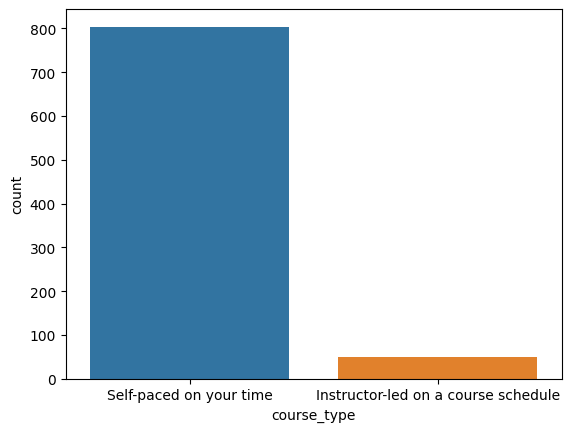

In [226]:
#Cantidad de cursos por tipo de aprendizaje
sns.countplot(data=edx, x="course_type", order=edx['course_type'].value_counts().index)

Es notable el desbalanceo. EDX claramente prioriza los cursos no guiados por instructores.

<AxesSubplot: xlabel='Level', ylabel='count'>

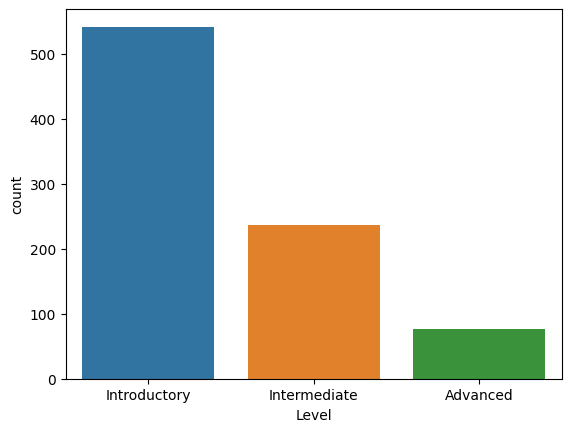

In [230]:
# Graficamos cantidad de cursos de acuerdo al nivel
sns.countplot(data=edx, x="Level", order=edx['Level'].value_counts().index)

Distribución similar a Udemy y lógica, aunque en este caso no ofrecen cursos multi-nivel

<AxesSubplot: xlabel='count', ylabel='subject'>

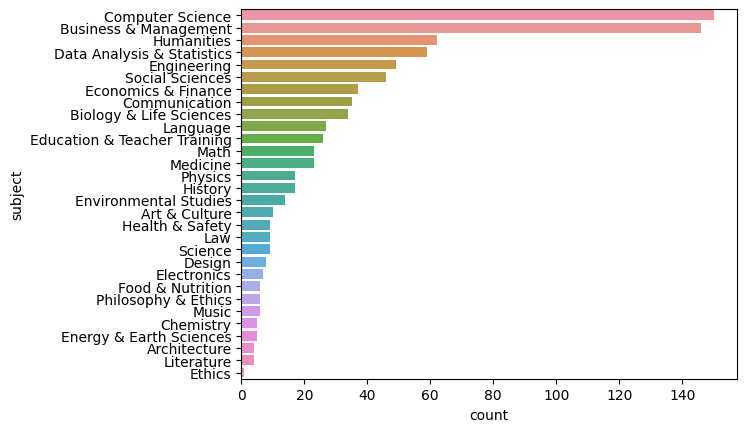

In [232]:
# Graficamos cantidad de cursos por Temática
sns.countplot(data=edx, y="subject", order=edx['subject'].value_counts().index)

Si bien la categorización en EDX es mas amplia, los dos cursos más ofrecidos coinciden en temática con los dos más ofrecidos por Udemy

<AxesSubplot: xlabel='language', ylabel='count'>

c:\Users\rcent\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
c:\Users\rcent\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
c:\Users\rcent\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
c:\Users\rcent\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
c:\Users\rcent\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missin

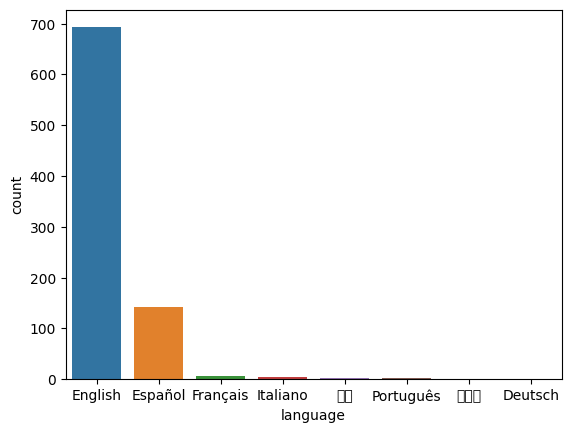

In [234]:
# Por último, la cantidad de cursos por lenguaje
sns.countplot(data=edx, x="language", order=edx['language'].value_counts().index)

Se nota una preponderancia total del inglés, pero también una importante cantidad de cursos en español

Generamos una nube de palabras con los títulos de los cursos.
Debemos tener en cuenta que en esta caso mezclaremos datos en mas de un idioma.

In [261]:
# Generamos las stopwords para los dos idiomas principales, ingles y español
stopwords2 = stopwords.words('english')
stopwords3 = stopwords.words('spanish')
stopwords = stopwords2 + stopwords3

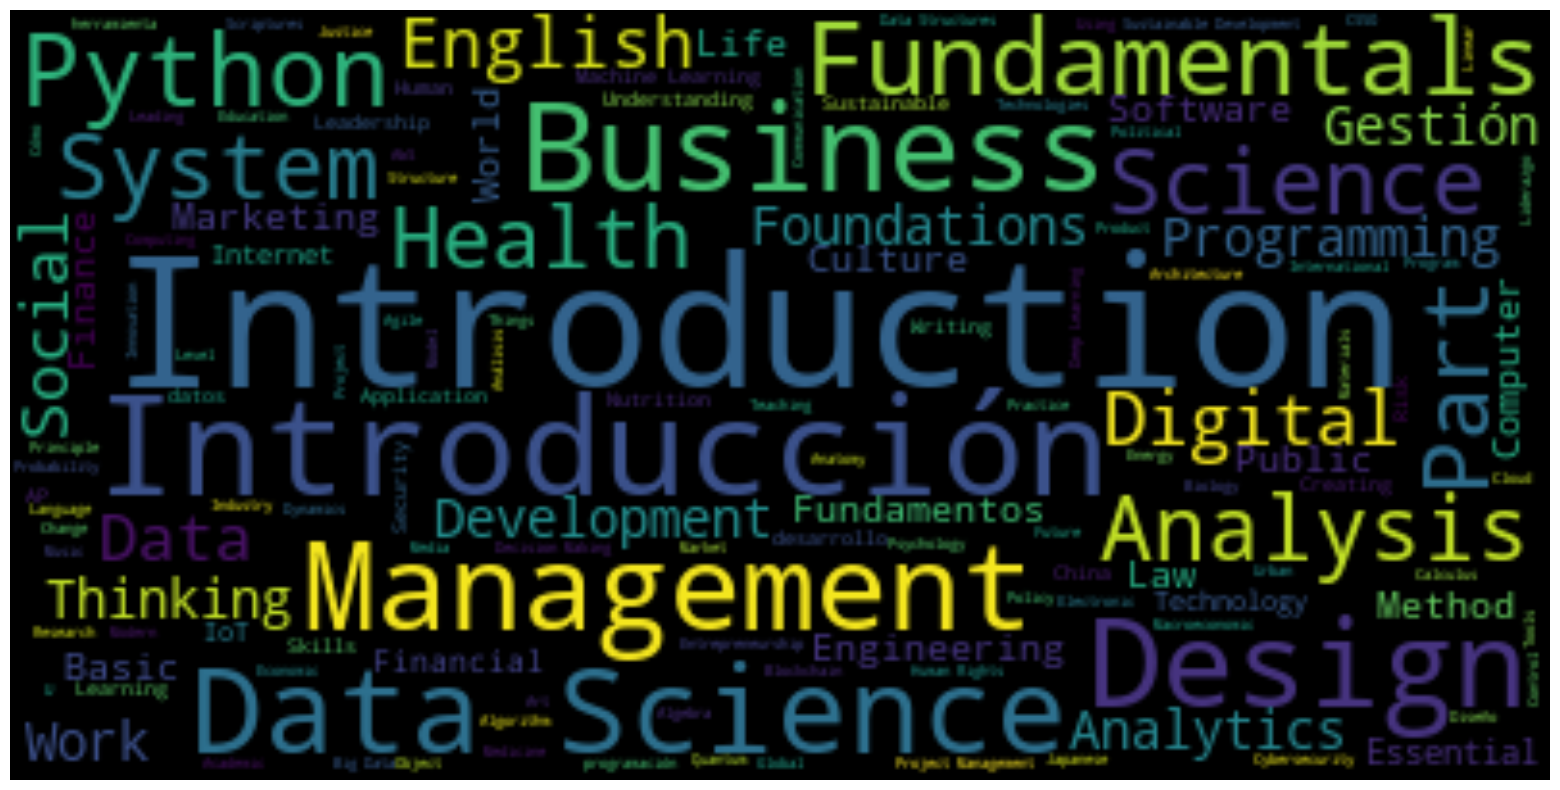

In [268]:
# Generamos la nube de palabras
texto = edx['title'].str.cat(sep=' ')
cloud = WordCloud(stopwords = stopwords).generate(texto)
plt.figure(figsize=(20,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nuevamente toman preponderancia las palabras que sugieren el caracter de introductorio de los cursos, pero hay una visible diferencia en cuanto a las temáticas de los cursos. Aquí se destacan palabras como Design, Business, Management, Data Science, Health, Python y Análisis.

Generamos ahora la nube de palabras solo con los cursos en Español, ya que debido al desbalanceo existente, las palabras en español se ven sobrepasadas por las en inglés

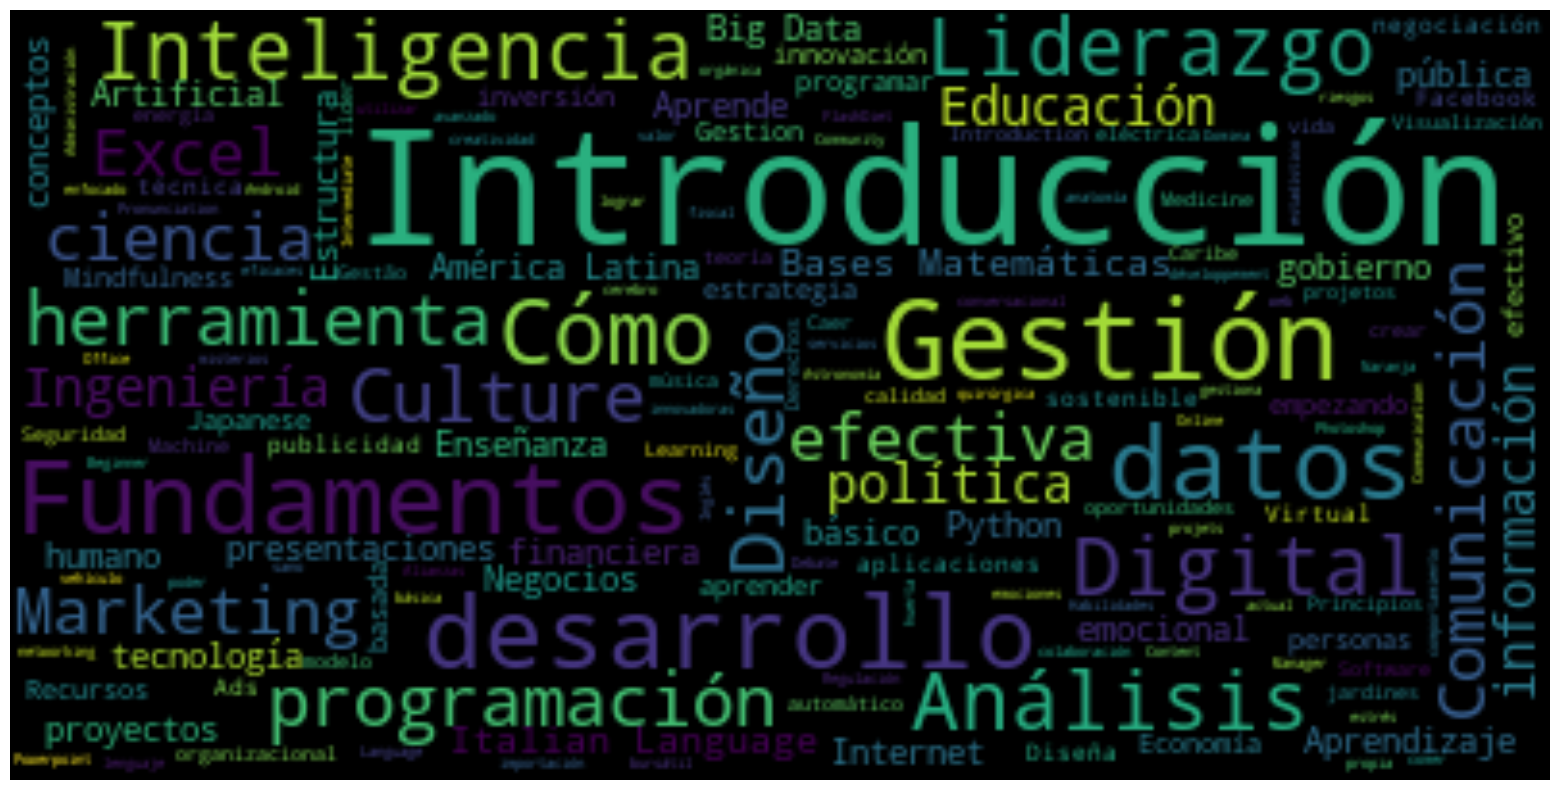

In [269]:
texto = edx['title'].mask(edx["language"]=="English").str.cat(sep=' ')
cloud = WordCloud(stopwords = stopwords).generate(texto)
plt.figure(figsize=(20,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Resultados similares. Algunas palabras nuevas que destacan aquí son Marketing, Liderazgo, Inteligencia, Comunicación y Educación

Continuaremos el analisis de Edx en PowerBi

In [271]:
# Exportamos el dataframe
edx.drop(["title"],axis=1).to_csv("edxpowerbi.csv")